# Final Project Notebook




### **EDA: Exploratory Data & Analysis**

**Two Categorical Variables:**

Goverment Spending - Transportation

Goverment Spending - Mass Transit

**Three Quantitative Variables:**

Goverment spending - transportation

Unemployment Rate

Personal Spending - Gas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("Monthly_Transportation_Statistics.csv")

In [2]:
#Carolina - Data Cleaning
data1 = data[["Date",
       "State and Local Government Construction Spending - Mass Transit",
       "State and Local Government Construction Spending - Transportation",
       "Highway Fuel Price - Regular Gasoline",
       "Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted",
       "Unemployment Rate - Seasonally Adjusted",
       'Unemployed - Seasonally Adjusted',
       'State and Local Government Construction Spending - Total',
       "State and Local Government Construction Spending - Pavement",
       "State and Local Government Construction Spending - Highway and Street",
       'State and Local Government Construction Spending - High School', 
       'State and Local Government Construction Spending - Correctional', 
       'State and Local Government Construction Spending - Neighborhood Center'
      ]]
data1 = data1.rename(columns = {
       "State and Local Government Construction Spending - Mass Transit": "GS Mass Transit",
       "State and Local Government Construction Spending - Transportation": "GS Transportation",
       "Highway Fuel Price - Regular Gasoline": "Gas Price",
       "Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted": "PS Gas Energy",
       "Unemployment Rate - Seasonally Adjusted": "Unemployment Rate",
        'Unemployed - Seasonally Adjusted': 'Unemployed',
        "State and Local Government Construction Spending - Total" : "GS Total",
        "State and Local Government Construction Spending - Pavement": "GS Pavement",
        "State and Local Government Construction Spending - Highway and Street": "GS Highway",
        'State and Local Government Construction Spending - High School':'high_school', 
        'State and Local Government Construction Spending - Correctional':'correctional', 
        'State and Local Government Construction Spending - Neighborhood Center':'neighborhood'

})

#Select Columns until first non NaN and reset index
q1data = data1.iloc[data1.notna().idxmax()[4]:913]
q1data = q1data.drop(columns = {"Unemployment Rate", "Unemployed"})
q1data = q1data[~q1data["PS Gas Energy"].isna()]
q1data = q1data.reset_index(drop=True)

q2data = data1.iloc[data1.notna().idxmax()[4]:913]
q2data = q2data.drop(columns = {"PS Gas Energy"})
q2data = q2data[~q2data["Unemployment Rate"].isna()]
q2data = q2data.reset_index(drop=True)


#### Histogram and KDE of Categorical Variables:  Personal Spending on Gas for Government Spending on Mass Transit and Transportation

In [3]:
#Carolina
goverment_transportation = q1data["GS Transportation"]
government_mass_transit = q1data["GS Mass Transit"]
personal_spending_gas = q1data["PS Gas Energy"]

date = q1data["Date"]
date = date.str.findall("\d{4}")
q1data["DemiDecade"] = date
q1data["DemiDecade"] = q1data["DemiDecade"].apply(lambda code: " ".join(set(code)))
q1data["DemiDecade"] = q1data["DemiDecade"].apply(lambda x: float(x) // 5 * 5)
q1data["DemiDecade"] = q1data["DemiDecade"].astype(int)

Text(0, 0.5, 'Density')

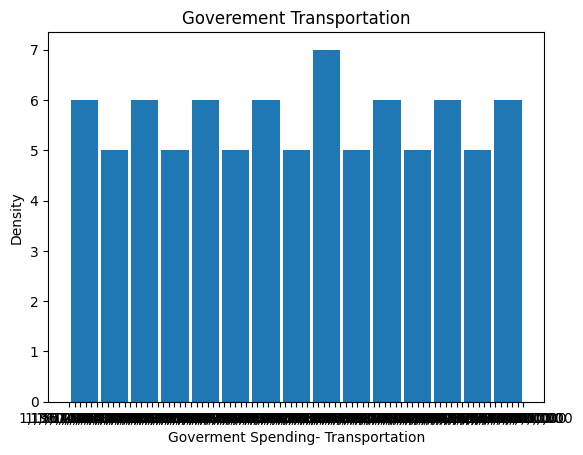

In [4]:
#Carolina
plt.hist(goverment_transportation, rwidth= 0.9, bins = 15)
plt.title("Goverement Transportation")
plt.xlabel("Goverment Spending- Transportation")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

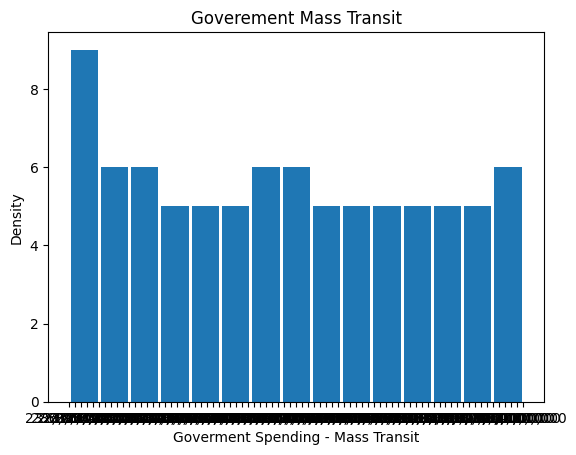

In [5]:
#Carolina
plt.hist(government_mass_transit, rwidth= 0.9, bins = 15)
plt.title("Goverement Mass Transit")
plt.xlabel("Goverment Spending - Mass Transit")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

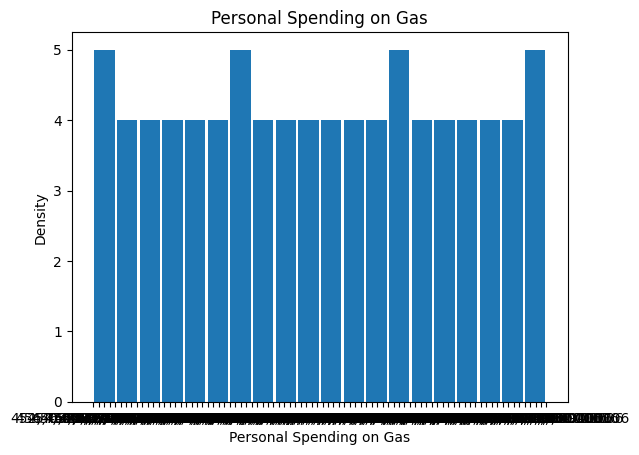

In [7]:
#Carolina - Overall historgram for personal spending on gas
plt.hist(personal_spending_gas, rwidth= 0.9, bins = 20)
plt.title("Personal Spending on Gas")
plt.xlabel("Personal Spending on Gas")
plt.ylabel("Density")

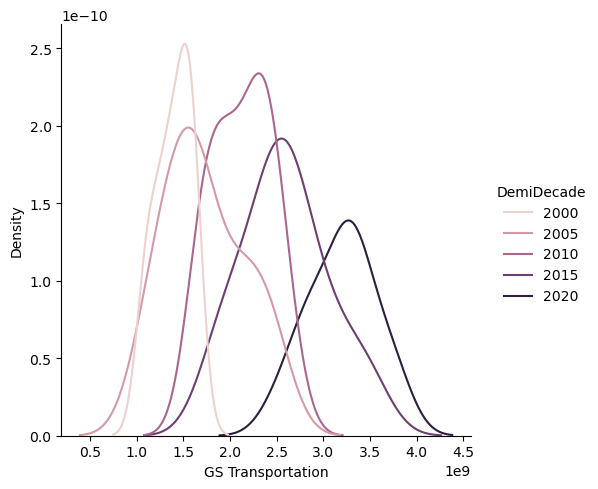

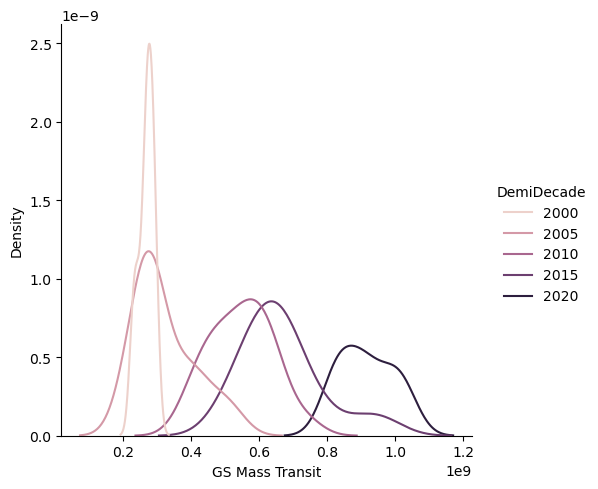

In [ ]:
#Carolina - KDE for goverment spending on transportation
sns.displot(q1data, x = goverment_transportation,  kind= "kde", hue = q1data["DemiDecade"])
sns.displot(q1data, x = government_mass_transit,  kind= "kde", hue = q1data["DemiDecade"])


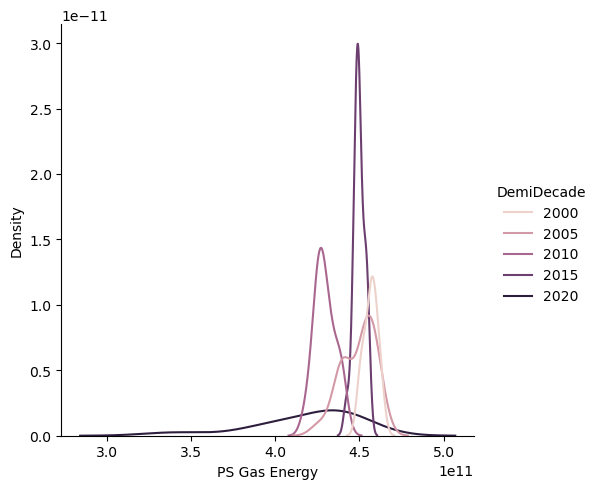

In [ ]:
#Carolina - KDE for personal gas for each year
sns.displot(q1data, x = personal_spending_gas, kind = "kde", hue =  q1data["DemiDecade"])

#### Boxplot of Categorical Variables: Personal Spending on Gas for Government Spending on Mass Transit and Transportation

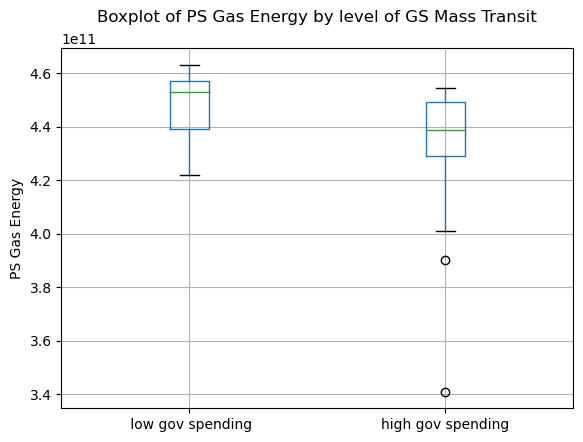

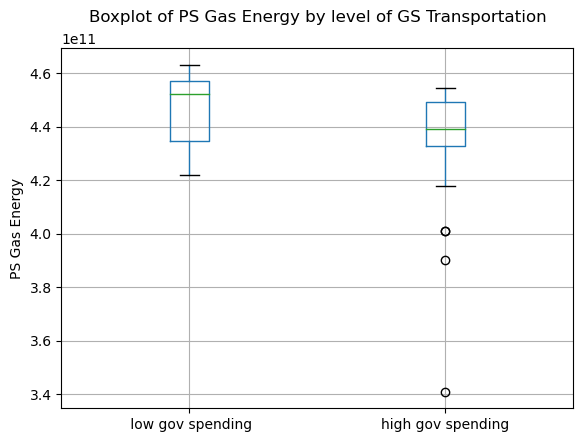

In [ ]:
percentiles  = [
    np.percentile(q1data["GS Mass Transit"], 50),
    np.percentile(q1data["GS Transportation"], 50)
]
    

def boxplot_func(gs_column,ps_column, index):
    
    high = q1data[q1data[gs_column] >= percentiles[index]][ps_column]
    low = q1data[q1data[gs_column] <= percentiles[index]][ps_column]

    df = pd.DataFrame({gs_column:high, ps_column:np.repeat("high gov spending",len(high))})
    df1 = pd.DataFrame({gs_column:low, ps_column:np.repeat(" low gov spending",len(low))})
    

    pd.concat([df,df1]).boxplot(column=gs_column,by=ps_column)
    plt.title("")
    plt.suptitle(f"Boxplot of {ps_column} by level of {gs_column}")
    plt.xlabel("")
    plt.ylabel(ps_column)

boxplot_func("GS Mass Transit", "PS Gas Energy", 0)
boxplot_func("GS Transportation", "PS Gas Energy", 1)

#### Histograms and KDEs of Quantitative Variables: Government Spending on Transportation and Personal Spending on Gas and other Energy

[]

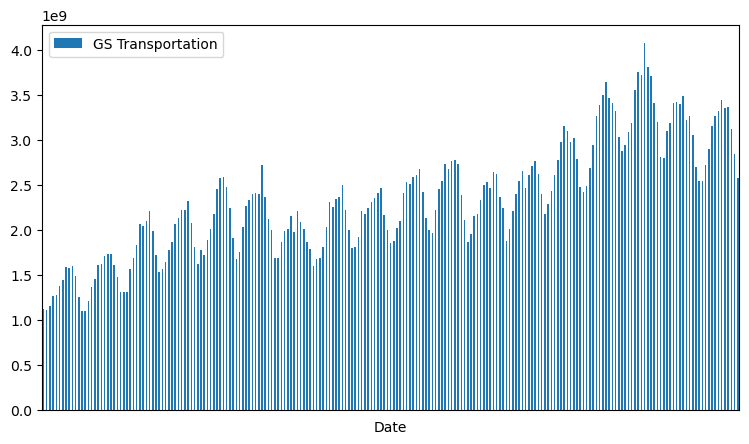

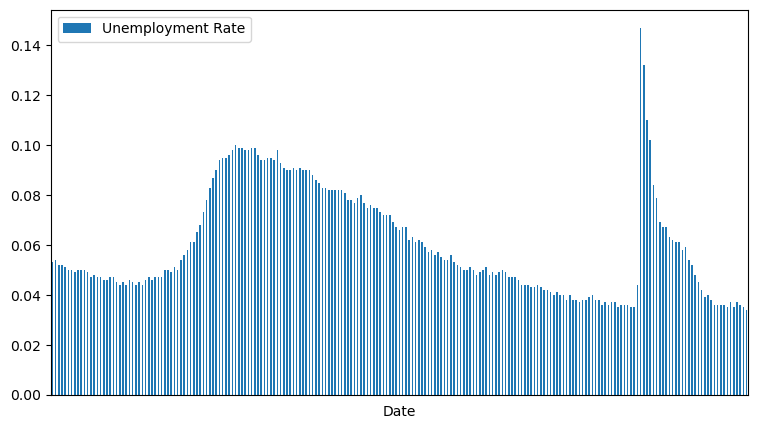

In [ ]:
q2data.plot(x="Date", y=["GS Transportation"], kind="bar", figsize=(9,5)).set_xticks([])
q2data.plot(x="Date", y=["Unemployment Rate"], kind="bar", figsize=(9,5)).set_xticks([])

Text(0.5, 1.0, 'Density of Unemployment Rate')

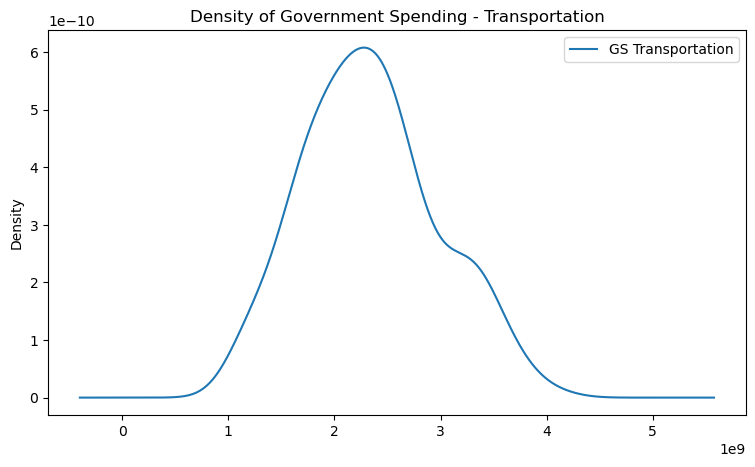

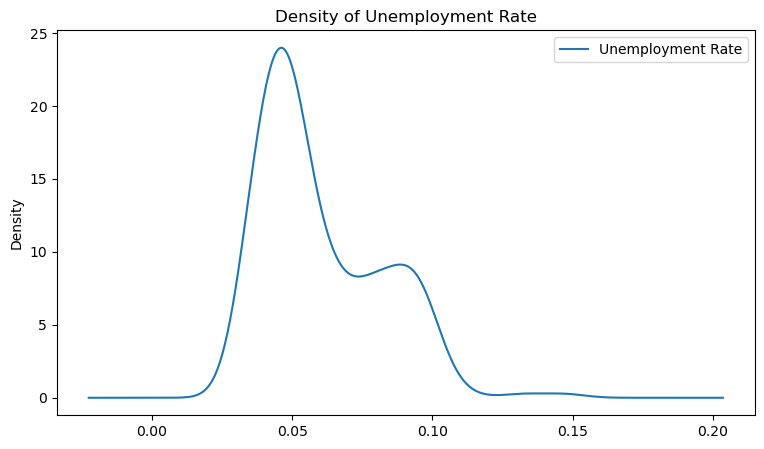

In [ ]:
q2data.plot(x="Date", y=["GS Transportation"], kind="kde", figsize=(9,5))
plt.title("Density of Government Spending - Transportation")
q2data.plot(x="Date", y=["Unemployment Rate"], kind="kde", figsize=(9,5))
plt.title("Density of Unemployment Rate")

#### Scatterplot of Quantitative Variables: Government Spending on Transportation and Personal Spending on Gas and other Energy

In [ ]:
gov_spending = q2data['GS Transportation']
unemployment_rate = q2data['Unemployment Rate']
unemployed = q2data['Unemployed']

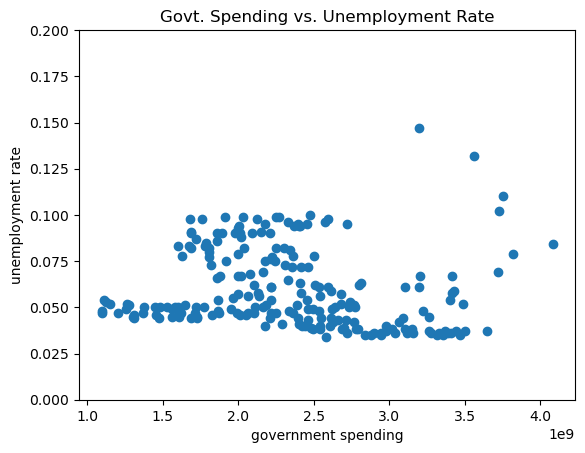

In [ ]:
plt.scatter(gov_spending, unemployment_rate)
plt.xlabel('government spending')
plt.ylabel('unemployment rate')
plt.title('Govt. Spending vs. Unemployment Rate')
plt.ylim(0,.2)
plt.show();

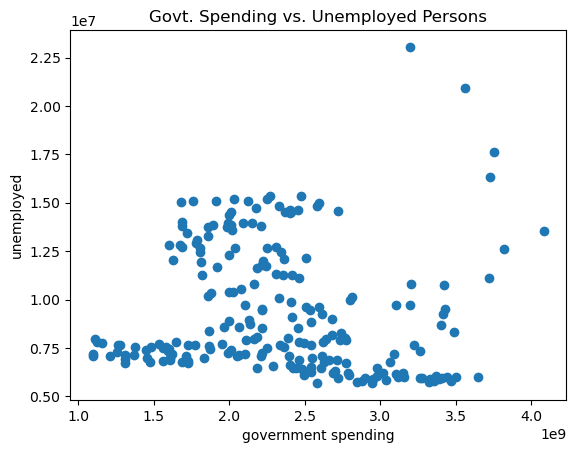

In [ ]:
plt.scatter(gov_spending, unemployed)
plt.xlabel('government spending')
plt.ylabel('unemployed')
plt.title('Govt. Spending vs. Unemployed Persons')
plt.show();

### **Research Question Results**

#### Question 1: How does government spending on public transportation affect personal spending on gas?

#### Question 2: Does better transportation imply less unemployment, since it makes it easier for people to get to their jobs?


### Question 1 Results

In [ ]:
import math
q1data["treat"] = q1data["GS Transportation"] > np.mean(q1data["GS Transportation"])
q1data["treat"] = q1data["treat"].astype(int)
outcomes = q1data.groupby(by = "treat").mean()["PS Gas Energy"]
causal_effect_q1data = outcomes[1] - outcomes[0]

print(f"The casual effect of government spending on transportation on personal spending on gas and other energy is ${np.round(causal_effect_q1data / 10 **9, 2)} billion under the naive model")

The casual effect of government spending on transportation on personal spending on gas and other energy is $-11.53 billion under the naive model


In [ ]:
import statsmodels.api as sm
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error
    
    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

linear_model = fit_OLS_model(q1data, "PS Gas Energy", ["treat", "GS Total", "GS Highway", "Gas Price", "GS Pavement"])
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          PS Gas Energy   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              731.6
Date:                Fri, 05 May 2023   Prob (F-statistic):                    1.31e-64
Time:                        12:33:49   Log-Likelihood:                         -2209.6
No. Observations:                  84   AIC:                                      4429.
Df Residuals:                      79   BIC:                                      4441.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
linear_model_ate = linear_model.params[0]
print(f"The casual effect of government spending on transportation on personal spending on gas and other energy is ${np.round(linear_model_ate / 10 **9, 2)} billion under the linear regression model")

The casual effect of government spending on transportation on personal spending on gas and other energy is $-97.8 billion under the linear regression model


In [ ]:
def draw_tau_hat(data=q1data, random_state=None):
    """Returns a single bootstrapped estimate of the ATE.
    
    Inputs:
        data: DataFrame of observed data
        random_state: integer to help standardize sampling output 
        for grading and troubleshooting purposes
    Output:
        float, estimated average treatment effect
    """
    sample = data.sample(n = len(data),random_state = random_state, replace = True)
    fit_model = fit_OLS_model(sample, "PS Gas Energy", ["treat","GS Total", "GS Highway", "Gas Price", "GS Pavement"])
    estimated_ate = fit_model.params[0]
    return estimated_ate

def get_bootstrapped_ate(data=q1data, n=1000):
    """Returns n bootstrapped estimates of the ATE.
    
    Inputs:
        data: DataFrame of observed data
        n: number of bootstrapped estimates we would like to return
    Output:
        list of estimated average treatment effects
    """
    estimates = []
    for i in np.arange(n):
        estimates.append(draw_tau_hat(data))
    return estimates

In [ ]:
ates = get_bootstrapped_ate(q1data, 1000)
confidence_interval = [np.percentile(ates, 2.5), 
                       np.percentile(ates, 97.5)]
print(f"Our 95% confidence interval for our ATE is ranges from {np.round(confidence_interval[0])} to {np.round(confidence_interval[1])}")

Our 95% confidence interval for our ATE is ranges from -138883447790.0 to -60226020207.0


Text(0.5, 1.0, 'Bootstrapped Estimates of the ATE')

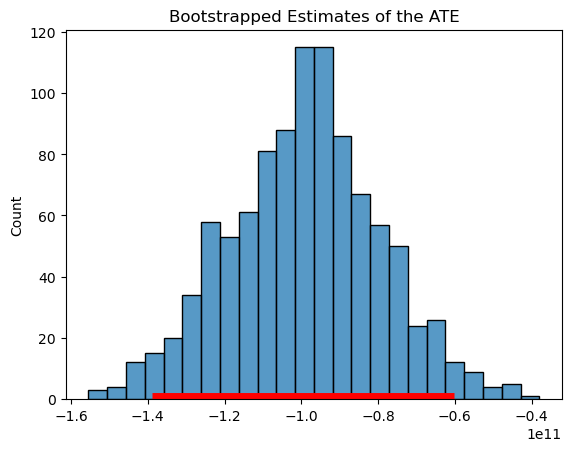

In [ ]:
sns.histplot(ates)
plt.hlines(1, confidence_interval[0], confidence_interval[1], linewidth=5, color = "red")
plt.title("Bootstrapped Estimates of the ATE")

In [ ]:
from sklearn.linear_model import LogisticRegression
X = ["GS Total", "GS Highway", "Gas Price", "GS Pavement"]
ps_model = LogisticRegression(C=1e6).fit(q1data[X], q1data["treat"])
q1data_ps = q1data.assign(propensity_score=ps_model.predict_proba(q1data[X])[:, 1])
q1data_ps.head()

,Date,GS Mass Transit,GS Transportation,Gas Price,PS Gas Energy,GS Total,GS Pavement,GS Highway,high_school,correctional,neighborhood,DemiDecade,treat,propensity_score
0,01/01/2002 12:00:00 AM,232000000.0,1.190000e+09,1.107,4.524630e+11,1.308500e+10,2.130000e+09,3.131000e+09,1.032000e+09,421000000.0,80000000.0,2000,0,0.275189
1,04/01/2002 12:00:00 AM,286000000.0,1.360000e+09,1.397,4.567650e+11,1.492000e+10,2.600000e+09,3.720000e+09,1.214000e+09,388000000.0,74000000.0,2000,0,0.287919
2,07/01/2002 12:00:00 AM,268000000.0,1.554000e+09,1.397,4.568760e+11,1.894900e+10,4.552000e+09,6.088000e+09,1.898000e+09,357000000.0,77000000.0,2000,0,0.648015
3,10/01/2002 12:00:00 AM,285000000.0,1.574000e+09,1.445,4.545270e+11,1.853100e+10,4.204000e+09,5.839000e+09,1.508000e+09,369000000.0,90000000.0,2000,0,0.605137
4,01/01/2003 12:00:00 AM,231000000.0,1.103000e+09,1.458,4.500490e+11,1.314000e+10,2.096000e+09,3.042000e+09,1.244000e+09,314000000.0,63000000.0,2000,0,0.250369


Text(0.5, 1.0, 'Histogram of Treatment | P=1')

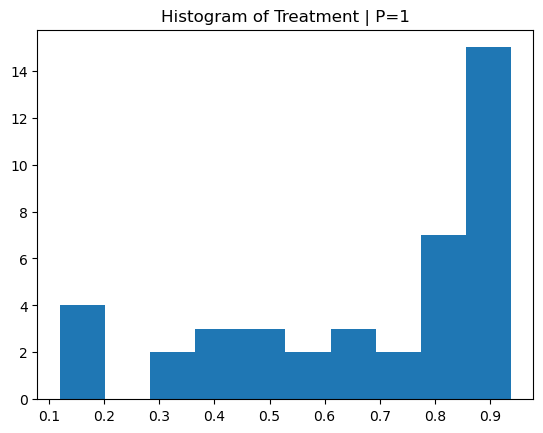

In [ ]:
plt.hist(q1data_ps[q1data_ps['treat'] == 1]['propensity_score']);
plt.title("Histogram of Treatment | P=1")

Text(0.5, 1.0, 'Histogram of Treatment | P=0')

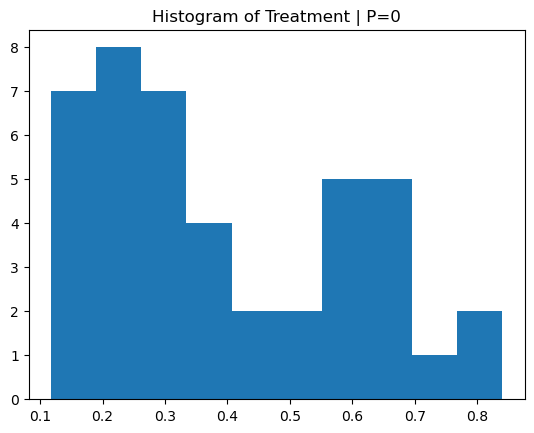

In [ ]:
plt.hist(q1data_ps[q1data_ps['treat'] == 0]['propensity_score']);
plt.title("Histogram of Treatment | P=0")

In [ ]:
new = q1data_ps[q1data_ps['propensity_score'].between(0.1,0.9)]
treat =q1data_ps[q1data_ps['treat'] == 1]
cont = q1data_ps[q1data_ps['treat'] == 0]

n = len(q1data_ps)

first = np.sum(treat["PS Gas Energy"] / treat['propensity_score']) / n

second = np.sum(cont["PS Gas Energy"] / (1- cont['propensity_score'])) / n

ipw_estimate = first - second
print(f"The casual effect of government spending on transportation on personal spending on gas and other energy is ${np.round(ipw_estimate / 10 **9, 2)} billion under the ipw model")

The casual effect of government spending on transportation on personal spending on gas and other energy is $-4.88 billion under the ipw model


### Question 2 Results

In [ ]:
#Data Cleaning for GLM
q2data["Unemployment_Rate"] = q2data["Unemployment Rate"]
q2data["log_GS_Mass_Transit"] = np.log(q2data["GS Mass Transit"])

Frequentist GLM

In [ ]:
freq_model = sm.GLM(q2data["Unemployment Rate"], exog = sm.add_constant(q2data[["log_GS_Mass_Transit"]]), 
                  family=sm.families.Gaussian())
freq_res = freq_model.fit()
print(freq_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Unemployment Rate   No. Observations:                  217
Model:                            GLM   Df Residuals:                      215
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      0.00046099
Method:                          IRLS   Log-Likelihood:                 526.61
Date:                Fri, 05 May 2023   Deviance:                     0.099114
Time:                        12:33:52   Pearson chi2:                   0.0991
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001376
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0988    

Bayesian GLM

In [ ]:
from pymc3 import *
import pymc3 as pm
with pm.Model() as bayes_model:
    glm.GLM.from_formula('Unemployment_Rate ~ log_GS_Mass_Transit', q2data, family=glm.families.Normal())
    # draw posterior samples using NUTS sampling
    norm_trace = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

/tmp/ipykernel_489/825888778.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  norm_trace = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, log_GS_Mass_Transit, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 35 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


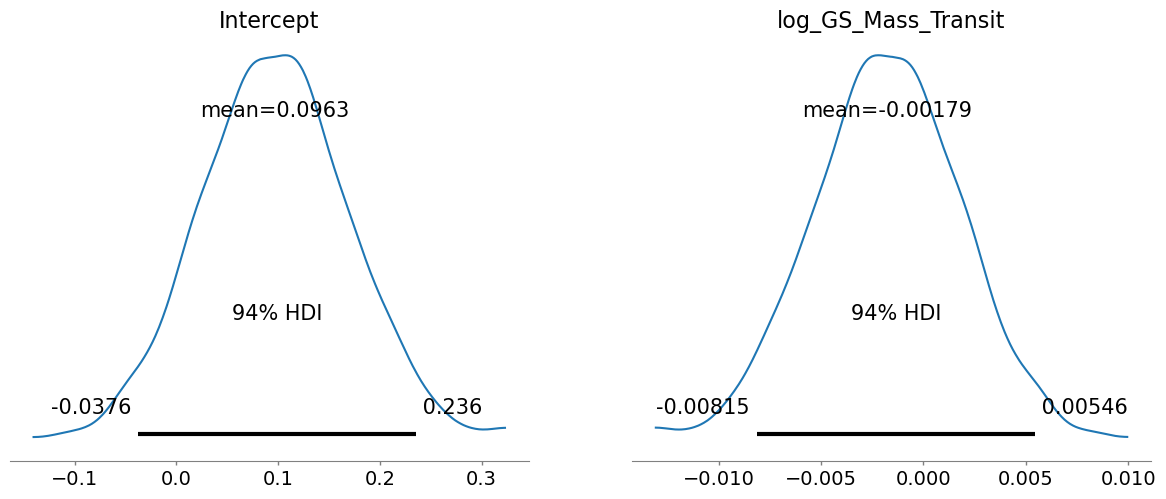

In [ ]:
import arviz as az
az.plot_posterior(norm_trace, ['Intercept', 'log_GS_Mass_Transit'], round_to = 3)
plt.show()


In [ ]:
with bayes_model:
    gaussian_ppc = pm.sample_posterior_predictive(
        norm_trace, var_names=["log_GS_Mass_Transit", "Intercept", "y"]
    )

In [ ]:
def compute_avg_prediction(ppc):
    linear_part = np.outer(ppc["log_GS_Mass_Transit"], q2data.log_GS_Mass_Transit.values) + ppc["Intercept"][:,np.newaxis]
    return linear_part
y_hat_gaussian = compute_avg_prediction(gaussian_ppc)

Posterior Predictive Check

/opt/conda/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


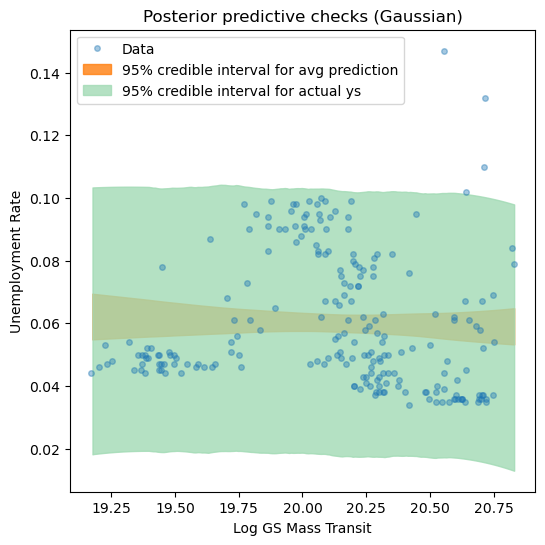

In [ ]:
_, ax = plt.subplots(figsize = (6,6))

ax.plot(q2data.log_GS_Mass_Transit, q2data.Unemployment_Rate, "o", ms=4, alpha=0.4, label="Data")
az.plot_hdi(
    q2data.log_GS_Mass_Transit,
    y_hat_gaussian,
    ax=ax,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.8, "label": "95% credible interval for avg prediction"},
)
az.plot_hdi(
    q2data.log_GS_Mass_Transit,
    gaussian_ppc["y"],
    ax=ax,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.8, "color": "#a1dab4", "label": "95% credible interval for actual ys"},
)

ax.set_xlabel("Log GS Mass Transit")
ax.set_ylabel("Unemployment Rate")
ax.set_title("Posterior predictive checks (Gaussian)")
ax.legend(fontsize=10);

Nonparametric Model: Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(q2data, test_size=0.3, random_state=101)

In [ ]:
X_cols = ["GS Mass Transit"]
y_col = "Unemployment Rate"
from sklearn.tree import DecisionTreeRegressor

forest_model = DecisionTreeRegressor(max_features=1)

reg = forest_model.fit(train[X_cols], train[y_col])

train["tree_pred"] = reg.predict(train[X_cols])
test["tree_pred"] = reg.predict(test[X_cols])
train_rmse = np.mean((train["tree_pred"] - train["Unemployment Rate"]) ** 2) ** 0.5
test_rmse = np.mean((test["tree_pred"] - test["Unemployment Rate"]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:    ", test_rmse)

Training set error for decision tree: 0.004339357334335949
Test set error for decision tree:     0.023842125947510843


Nonparametric Model: Random Forest

In [ ]:
X_cols = ["GS Mass Transit"]
y_col = "Unemployment Rate"
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features=1)

reg = forest_model.fit(train[X_cols], train[y_col])

train["forest_pred"] = reg.predict(train[X_cols])
test["forest_pred"] = reg.predict(test[X_cols])
train_rmse = np.mean((train["forest_pred"] - train["Unemployment Rate"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["Unemployment Rate"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

Training set error for random forest: 0.008315488754768795
Test set error for random forest:     0.021253011462051535
